<h1> Saumay Agrawal </h1>
<h2> 16BCE1151 </h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import networkx as nx

In [2]:
# Defining the outlink matrix for given question

matrix = [[0,1,1,1,0],
          [1,0,1,1,0],
          [0,0,0,1,0],
          [0,0,1,0,1],
          [0,1,1,1,0]]

nnodes = len(matrix)

# Returns the inlinks of a node
def getInlinks(node):
    return [row for row in range(nnodes) if matrix[row][node]==1]

# Returns the outlinks of a node
def getOutlinks(node):
    return [i for i in range(nnodes) if matrix[node][i]==1 ]

# Returns the weightin(v, u)
def getWeightIn(v, u):
    rv = getInlinks(v)
    ip = [len(getInlinks(p)) for p in rv]
    win = len(getInlinks(u))/sum(ip)
    return win

# Returns the weightout(v, u)
def getWeightOut(v, u):
    rv = getInlinks(v)
    ip = [len(getOutlinks(p)) for p in rv]
    wout = len(getOutlinks(u))/sum(ip)
    return wout

# Returns the page ranks over n iterations
def pageRank(d, n):
    mat = []
    pr = [1 for i in range(nnodes)]
    for _ in range(n):
        mat.append(pr)
        prtemp = [0 for i in range(nnodes)]
        for u in range(nnodes):
            summation = 0
            for v in getInlinks(u):
                summation += pr[v] / len(getOutlinks(v))
            prtemp[u] = (1-d) + d*summation
            prtemp[u] = round(prtemp[u],5)
        pr = prtemp
    df = pd.DataFrame(mat, columns=['A', 'B', 'C', 'D', 'E'])
    return df

# Returns the weighted page ranks over n iterations
def weightedPR(d, n):
    mat = []
    pr = [1 for i in range(nnodes)]
    for _ in range(n):
        mat.append(pr)
        prtemp = [0 for i in range(nnodes)]
        for u in range(nnodes):
            summation = 0
            for v in getInlinks(u):
                summation += pr[v] * getWeightIn(v, u) * getWeightOut(v,u)
            prtemp[u] = (1-d) + d*summation
            prtemp[u] = round(prtemp[u],5)
        pr = prtemp
    df = pd.DataFrame(mat, columns=['A', 'B', 'C', 'D', 'E'])
    return df

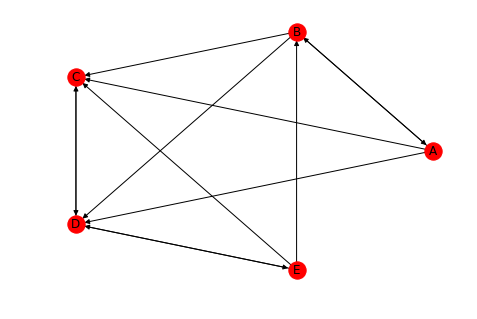

In [3]:
#Plotting the network graph for pages

G = nx.DiGraph()
nodes = ['A', 'B', 'C', 'D', 'E']
G.add_nodes_from(nodes)
for i in range(nnodes):
    for j in range(nnodes):
        if matrix[i][j]==1:
            G.add_edge(nodes[i], nodes[j])
nx.draw_shell(G, with_labels=True, arrows=True)

In [4]:
# Results of normal page rank algorithm
print('Normal page rank')
npr = pageRank(0.5, 10)
npr.head(10)

Normal page rank


,A,B,C,D,E
0,1.00000,1.00000,1.00,1.0,1.000
1,0.66667,0.83333,1.25,1.5,0.750
2,0.63889,0.73611,1.25,1.5,0.875
3,0.62269,0.75232,1.25,1.5,0.875
4,0.62539,0.74962,1.25,1.5,0.875
5,0.62494,0.75006,1.25,1.5,0.875
6,0.62501,0.74999,1.25,1.5,0.875
7,0.62500,0.75000,1.25,1.5,0.875
8,0.62500,0.75000,1.25,1.5,0.875
9,0.62500,0.75000,1.25,1.5,0.875


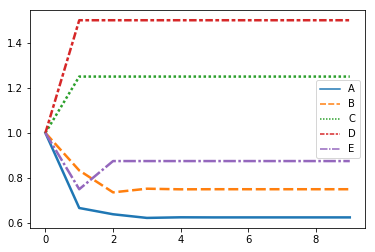

In [5]:
# Plot of normal page ranks across iterations
sb.lineplot(data=npr, linewidth=2.5)

In [6]:
# Results of weighted page rank algorithm
print('Weighted page rank')
wpr = weightedPR(0.5, 10)
wpr.head(10)

Weighted page rank


,A,B,C,D,E
0,1.00000,1.00000,1.00000,1.00000,1.00000
1,0.62500,1.37500,1.27500,2.04545,0.51875
2,0.67188,1.00703,1.11832,1.69233,0.53835
3,0.62588,1.03782,1.06869,1.60360,0.53173
4,0.62973,1.01234,1.05462,1.57764,0.53007
5,0.62654,1.01364,1.05059,1.57024,0.52958
6,0.62671,1.01186,1.04944,1.56812,0.52944
7,0.62648,1.01189,1.04911,1.56752,0.52940
8,0.62649,1.01177,1.04901,1.56734,0.52939
9,0.62647,1.01177,1.04899,1.56729,0.52939


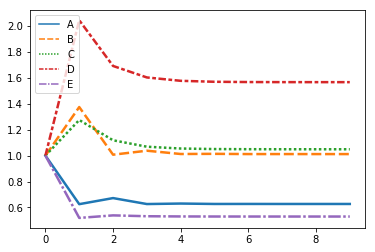

In [7]:
# Plot of weighted page ranks across iterations
sb.lineplot(data=wpr, linewidth=2.5)